Enter the keyword/Hashtag to search about :Narendra Modi
Enter the no. of tweets to analyze :300
How people are reacting on Narendra Modi by analyzing 300 tweets.
Overall Polarity is Positive


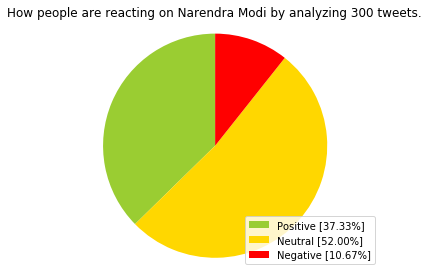

In [20]:
import tweepy
import sys
import matplotlib.pyplot as plt
from textblob import TextBlob

def percentage(part,whole):
    return 100*float(part)/float(whole)



consumerKey = 'qv9XpEWLEX3rhmAkQovbD5JBX'
consumerSecret = 'lH6dcFf6e0zSYVjuT2INnqNN4L3DsXTWzFEoTIJL0fIQPcQ1iz'
accessToken = '2580173551-SKCLrnsI1kWAOyie0GxpXBdUp1r0e8ADAIqYmCZ'
accessTokenSecret = 'vtQvPJtOlACDFxVnPBXzY2TTbXawJDHs5bFMQulynYxu1'

#Establishing the connection

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


searchTerm=input("Enter the keyword/Hashtag to search about :")
noofsearchTerms=int(input("Enter the no. of tweets to analyze :"))

tweets = tweepy.Cursor(api.search, q=searchTerm,lang="en").items(noofsearchTerms)


positive=0
negative=0
neutral=0
polarity=0

for tweet in tweets:
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1
        
        
        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofsearchTerms)
negative=percentage(negative,noofsearchTerms)
neutral=percentage(neutral,noofsearchTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')



print("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")


if (polarity==0):
    print("Overall Polarity is Neutral")
elif (polarity>0):
    print("Overall Polarity is Positive")
elif (polarity<0):
    print("Overall Polarity is Negative")
    
    
labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")
plt.axis("equal")
plt.tight_layout()
plt.show();


